Episode  1, epsilon   0.82, batch size  200, ep return 9138900.9
Episode  2, epsilon   0.62, batch size  400, ep return 10524025.5
Episode  3, epsilon   0.43, batch size  600, ep return 6655731.0
Episode  4, epsilon   0.23, batch size  800, ep return 7210386.9
Episode  5, epsilon   0.03, batch size 1000, ep return 4981776.8
Episode  6, epsilon   0.01, batch size 1200, ep return 3501872.7
Episode  7, epsilon   0.01, batch size 1400, ep return 3651918.8
Episode  8, epsilon   0.01, batch size 1600, ep return 3613249.2
Episode  9, epsilon   0.01, batch size 1800, ep return 3593544.6
Episode 10, epsilon   0.01, batch size 2000, ep return 3498953.2
Episode 11, epsilon   0.01, batch size 2200, ep return 3636496.9
Episode 12, epsilon   0.01, batch size 2400, ep return 3499167.3
Episode 13, epsilon   0.01, batch size 2600, ep return 3776983.2
Episode 14, epsilon   0.01, batch size 2800, ep return 3533953.3
Episode 15, epsilon   0.01, batch size 3000, ep return 3505118.6
Episode 16, epsilon   0.

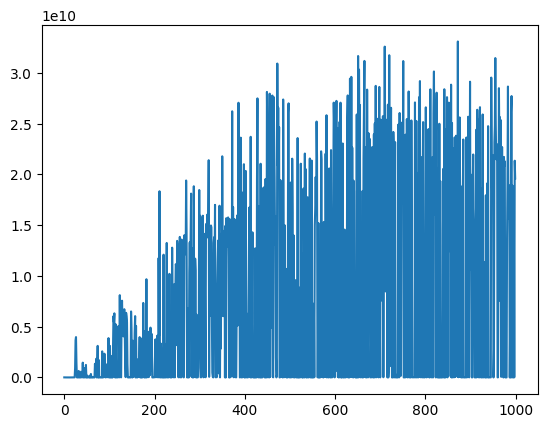

In [1]:
import train
import env_hiv
import torch
# DQN config

pagent = train.ProjectAgent()
res = pagent.train()
import matplotlib.pyplot as plt
plt.plot(res[0])
pagent.save('')

In [ ]:
pagent.device

device(type='cuda')